<center><h4><b>PHY4905/5905: Computational Physics – Spring 2022</b></h4></center>
<center><h4><b>Homework #2</b></h4></center>
<center><h4><b>Code Author: Pratiksha Balasaheb Gaikwad</b></h4></center>
<hr style="height:2px;border-width:0;color:orange;background-color:orange">
<hr style="height:2px;border-width:0;color:blue;background-color:blue">



<center><b>An Unstable Calculation</b></center>

Consider the following sequence and recurrence relation:
$$x_0 = 1, x_1 = \frac{1}{5}, x_{n+1} = \frac{11}{5}x_n − \frac{2}{5}x_{n−1}$$

which is equivalent to
$$x_n = (\frac{1}{5})^n$$


In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def recurrence(nmax, x0, x1, prec):
    '''
    Recurrence function takes following parameters & returns array with all x_n values.
    
    PARAMETERS
    nmax : to set max value of range of 'n' values ranging from 0
    x : array of x_n values with first two initial values
    prec : takes single OR double precision
    '''
    
    # array for range of n values
    n_vals = np.arange(0,nmax+1,1)
    x_vals = np.array([x0, x1])# dtype=prec)
    
    # Loop to calculate all possible x_{n+1} == new_xn values
    for n in np.arange(1, np.size(n_vals)):
        new_xn = (11.0*x_vals[n]/5.0)-(2.0*x_vals[n-1]/5.0)
        x_vals = np.append(x_vals, new_xn)
        
    return x_vals, n_vals

In [3]:
def exact_xn_1st(k, prec):
    '''
    Function returns the exact solution for xn value.
    
    It's 1st function out of two functions we'll be using to compare values in this exercise.
    
    PARAMETERS
    k : (for k th value of x)
    prec :takes input 'np.float32' or 'np.float64'(single- or double- precision) 
    '''
    return prec(1/5)**k

In [4]:
# Computing absolute & relative error

def err_calc(fx_exact, x_vals, n_vals, verbose="True"):
    '''Function calculates, stores and returns the arrays of relative & absolute errors at 'n' values.
    
    PARAMETERS
    fx_exact : function to calculate exact x_n value
    x_vals   : array of 'x_n' values obtained from 'recurrence' function
    n_vals   : array of 'n' values generated in the 'recurrence' function
    verbose  : Is set to either "True" - to print errors at each 'n' value otherwise  to "False"   
    '''
    eabs_vals = np.zeros(np.size(n_vals))
    erel_vals = np.zeros(np.size(n_vals))
    
    #for n in np.arange(0, np.size(n_vals)):
    for n in n_vals:

        exact = fx_exact(n_vals[n], prec)
        eabs_vals[n] = abs(exact - x_vals[n])
        erel_vals[n] = abs((exact - x_vals[n])/exact)
        
        if verbose == "True":
            #print(f"{n} \t {erel_vals[n]} \t\t {eabs_vals[n]} \n")
            print(f"{n} \t {exact:>22} \t {x_vals[n]:>22} \t\t {erel_vals[n]:>22} \t\t {eabs_vals[n]:>22}\n")

    return erel_vals, eabs_vals
    

**(a)** Implement the recurrence relation for $n = 0, ...,4$ using single-precision floating point numbers. Compute the absolute and relative error with respect to the exact solution $x_n= (1/5)^n$. How big are the relative and absolute error at $n = 4$? What if you go to $n = 20$?

In [40]:
# Setting single-precision
prec = np.float32

# Initial values
x0 = np.float32(1)
x1 = np.float32(1/5)


In [41]:
# Implementing recurrence relation for n=0,...,4
nmax = 4
x,n = recurrence(nmax, x0, x1, prec)


In [44]:
# Printing calculations at each 'n' value
# if prec == np.float32:
#     print("\n-------Calculations with single-precision floating-point numbers.-------\n")
# else:
#     print("\n-------Calculations with double-precision floating-point numbers.-------\n")


# Printing errors at 'n' value
#print(f"n \t  Relative Error \t\t\t Absolute Error \n")
# print(f"n \t Exact Value \t\t Recurrence value \t\t Relative Error \t\t Absolute Error\n")

# Set verbose="True" to print errors at each 'n'.
erels_4s, eabs_4s = err_calc(exact_xn_1st, x, n, verbose="False")  


In [45]:
# Printing calculations at n = 4 only
if prec == np.float32:
    print("\n-------Calculations with single-precision floating-point numbers.-------\n")
else:
    print("\n-------Calculations with double-precision floating-point numbers.-------\n")


# Printing errors at 'n' value
print(f"n \t Exact Value \t\t Recurrence value \t\t Relative Error \t\t\t Absolute Error \n")

# Set verbose="True" to print errors at each 'n'.
erels_4s, eabs_4s = err_calc(exact_xn_1st, x, n, verbose="False")

print(f"{nmax} \t {exact_xn_1st(nmax,prec)} \t {x[nmax]} \t\t{erels_4s[nmax]} \t\t {eabs_4s[nmax]} \n") # Printing errors at n = 4
            


-------Calculations with single-precision floating-point numbers.-------

n 	 Exact Value 		 Recurrence value 		 Relative Error 			 Absolute Error 

4 	 0.0016000000953674339 	 0.0016000264883041307 		1.6495584452303916e-05 		 2.6392936696827823e-08 



In [47]:
# Implementing recurrence relation for n=0,...,20
nmax = 20
x,n = recurrence(nmax, x0, x1, prec)


In [48]:

# Printing calculations only at n = 20
if prec == np.float32:
    print("\n-------Calculations with single-precision floating-point numbers.-------\n")
else:
    print("\n-------Calculations with double-precision floating-point numbers.-------\n")


# Printing errors at 'n' value
print(f"n \t  Relative Error \t\t Absolute Error \n")

# Set verbose="True" to print errors at each 'n'.
erels_20s, eabs_20s = err_calc(exact_xn_1st, x, n, verbose="False")

print(f"{nmax} \t {erels_20s[nmax]} \t\t {eabs_20s[nmax]} \n") # Printing errors at n = 20



-------Calculations with single-precision floating-point numbers.-------

n 	  Relative Error 		 Absolute Error 

20 	 165568408318.16425 		 0.0017361111106076234 



<hr style="height:2px;border-width:0;color:orange;background-color:orange">

<u><b>Observation for single-precision: Change in relative error from n=4 to n=20</b></u>

In [49]:
scaling = '%.2e' % (erels_20s[20]/erels_4s[4])
print(scaling)


1.00e+16


As we go from $n = 4$ to $n = 20$,  
Scaling  ~ $10^{16} = 10^{(20-4)} = \frac{10^{20}}{10^4}$.   
Therefore, the relative error in calculation of $x_n$ with single-precision scales **almost** with $10^n$.

<hr style="height:2px;border-width:0;color:blue;background-color:blue">

**(b)** Repeat these calculations using double-precision floating point numbers. How big are the relative and absolute error at $n = 4$? What if you go to $n = 20$?

In [13]:
# Setting single-precision
prec = np.float64

# Initial values
x0 = np.float64(1)
x1 = np.float64(1/5)

In [14]:
# Implementing recurrence relation for n=0,...,4
nmax = 4
x,n = recurrence(nmax, x0, x1, prec)


In [50]:
# Printing calculations at n = 4 
if prec == np.float32:
    print("\n-------Calculations with single-precision floating-point numbers.-------\n")
else:
    print("\n-------Calculations with double-precision floating-point numbers.-------\n")
    
# Printing errors at 'n' value
print(f"n \t  Relative Error \t\t\t Absolute Error \n")

# Set verbose="True" to print errors at each 'n'.
erels_4d, eabs_4d = err_calc(exact_xn_1st, x, n, verbose="False")

print(f"{nmax} \t {erels_4d[nmax]} \t\t {eabs_4d[nmax]} \n") # Printing errors at n = 4



-------Calculations with single-precision floating-point numbers.-------

n 	  Relative Error 			 Absolute Error 

20 	 165568408318.16425 		 0.0017361111106076234 



In [17]:
# Implementing recurrence relation for n=0,...,20
nmax = 20
x,n = recurrence(nmax, x0, x1, prec)

In [19]:
# Printing calculations at n = 20
if prec == np.float32:
    print("\n-------Calculations with single-precision floating-point numbers.-------\n")
else:
    print("\n-------Calculations with double-precision floating-point numbers.-------\n")


# Printing errors at 'n' value
print(f"n \t  Relative Error \t\t Absolute Error \n")

# Set verbose="True" to print errors at each 'n'.
erels_20d, eabs_20d = err_calc(exact_xn_1st, x, n, verbose="False")

print(f"{nmax} \t {erels_20d[nmax]} \t\t {eabs_20d[nmax]} \n") # Printing errors at n = 20


-------Calculations with double-precision floating-point numbers.-------

n 	  Relative Error 		 Absolute Error 

20 	 959.5942872055398 		 1.0062075393008372e-11 



<hr style="height:2px;border-width:0;color:orange;background-color:orange">

<u><b>Observation for double-precision: Change in relative error from n=4 to n=20</u></b>

In [20]:
scaling = '%.2e' % (erels_20d[20]/erels_4d[4])
print(scaling)

1.00e+16


As we go from $n = 4$ to $n = 20$,  
Scaling  is exactly equal to $10^{16} = 10^{(20-4)} = \frac{10^{20}}{10^4}$.   
Therefore, the relative error in calculation of $x_n$ with single-precision scales **exactly** with $10^n$.

<hr style="height:2px;border-width:0;color:orange;background-color:orange">

<u><b>Observation for n=4: Change in relative error from single- to double- precision</u></b>

In [21]:
scaling = '%.2e' % (erels_4s[4]/erels_4d[4])
print("Relative error with single-precision calculation is\n",scaling, "\nfold than that of with double-precision calculation.")


Relative error with single-precision calculation is
 1.72e+08 
fold than that of with double-precision calculation.


<u><b>Observation for n=20: Change in relative error from single- to double- precision</u></b>

In [22]:
scaling = '%.2e' % (erels_20s[20]/erels_20d[20])
print("Relative error with single-precision calculation is\n",scaling, "\nfold than that of with double-precision calculation.")


Relative error with single-precision calculation is
 1.73e+08 
fold than that of with double-precision calculation.


<hr style="height:2px;border-width:0;color:blue;background-color:blue">

<center><b>Graphs</b><center>

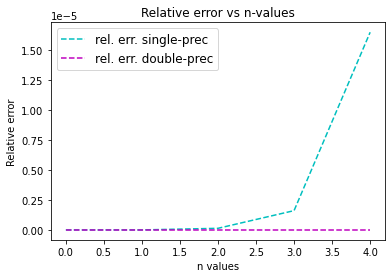

In [23]:
n_vals = np.arange(0,5,1)

fig, ax = plt.subplots()
ax.plot(n_vals,erels_4s,  'c--',label='rel. err. single-prec')
ax.plot(n_vals,erels_4d,  'm--',label='rel. err. double-prec')
legend = ax.legend(loc='best', fontsize='large')

ax.set_title('Relative error vs n-values')
ax.set_xlabel("n values")
ax.set_ylabel('Relative error')

plt.show()

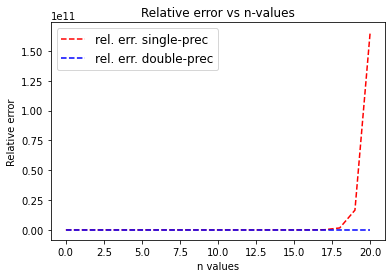

In [24]:
n_vals = np.arange(0,21,1)

fig, ax = plt.subplots()
ax.plot(n_vals,erels_20s, 'r--', label='rel. err. single-prec')
ax.plot(n_vals,erels_20d, 'b--', label='rel. err. double-prec')
legend = ax.legend(loc='best', fontsize='large')

ax.set_title('Relative error vs n-values')
ax.set_xlabel("n values")
ax.set_ylabel('Relative error')
plt.show()

<hr style="height:2px;border-width:0;color:blue;background-color:blue">


**(c)** Now do the same using this relation with $x_0 = 1 \& x_1 = 2$, and compare it to $x_n= 2^n$. Go to $n = 20$. Why is this calculation more stable?

In [25]:
def exact_xn_2nd(k, prec):
    '''
    Function returns the exact solution for xn value.
    
    It's 1st function out of two functions we'll be using to compare values in this exercise.
    
    PARAMETERS
    k : (for k th value of x)
    prec :takes input 'np.float32' or 'np.float64'(single- or double- precision) 
    '''
    return prec(2**k)

<center><b><u>With single-precision</u></b></center>

In [26]:
# Setting single-precision
prec = np.float32

# Initial values
x0 = np.float32(1)
x1 = np.float32(2)

In [27]:
# Implementing recurrence relation for n=0,...,4
nmax = 4
x,n = recurrence(nmax, x0, x1, prec)

In [51]:
# Printing calculations at n = 4
if prec == np.float32:
    print("\n-------Calculations with single-precision floating-point numbers.-------\n")
else:
    print("\n-------Calculations with double-precision floating-point numbers.-------\n")

# Printing errors at 'n' value
print(f"n \t  Relative Error \t\t\t Absolute Error \n")

# Set verbose="True" to print errors at each 'n'.
# Set function 'exact_xn_2nd' to calculate exact values.
erels_4s, eabs_4s = err_calc(exact_xn_2nd, x, n, verbose="False")

print(f"{nmax} \t {erels_4s[nmax]} \t\t\t\t\t {eabs_4s[nmax]} \n") # Printing errors at n = 4


-------Calculations with single-precision floating-point numbers.-------

n 	  Relative Error 			 Absolute Error 

20 	 0.9999999983443154 					 1048575.9982638889 



In [30]:
# Implementing recurrence relation for n=0,...,20
nmax = 20
x,n = recurrence(nmax, x0, x1, prec)

In [31]:
# Printing calculations at each 'n' value
if prec == np.float32:
    print("\n-------Calculations with single-precision floating-point numbers.-------\n")
else:
    print("\n-------Calculations with double-precision floating-point numbers.-------\n")

    
# Printing errors at 'n' value
print(f"n \t Exact Value \t\t\t\t Recurrence value \t\t\t Relative Error \t\t\t Absolute Error \n")

# Set verbose="True" to print errors at each 'n'.
erels_20s, eabs_20s = err_calc(exact_xn_2nd, x, n, verbose="False")




-------Calculations with single-precision floating-point numbers.-------

n 	 Exact Value 				 Recurrence value 			 Relative Error 			 Absolute Error 



In [32]:
# Printing calculations at n = 20
if prec == np.float32:
    print("\n-------Calculations with single-precision floating-point numbers.-------\n")
else:
    print("\n-------Calculations with double-precision floating-point numbers.-------\n")

    
# Printing errors at 'n' value
print(f"n \t  Relative Error \t\t Absolute Error \n")

# Set verbose="True" to print errors at each 'n'.
erels_20s, eabs_20s = err_calc(exact_xn_2nd, x, n, verbose="False")

print(f"{nmax} \t {erels_20s[nmax]} \t\t\t\t {eabs_20s[nmax]} \n") # Printing errors at n = 20



-------Calculations with single-precision floating-point numbers.-------

n 	  Relative Error 		 Absolute Error 

20 	 0.0 				 0.0 



<center><b><u>With double-precision</u></b></center>

In [33]:
# Setting single-precision
prec = np.float64

# Initial values
x0 = np.float64(1)
x1 = np.float64(2)

In [34]:
# Implementing recurrence relation for n=0,...,4
nmax = 4
x,n = recurrence(nmax, x0, x1, prec)

In [35]:
# Printing calculations at each 'n' value
if prec == np.float32:
    print("\n-------Calculations with single-precision floating-point numbers.-------\n")
else:
    print("\n-------Calculations with double-precision floating-point numbers.-------\n")

# Printing errors at 'n' value
print(f"n \t Exact Value \t\t\t\t Recurrence value \t\t\t Relative Error \t\t\t Absolute Error \n")

# Set verbose="True" to print errors at each 'n'.
# Set function 'exact_xn_2nd' to calculate exact values.
erels_4d, eabs_4d = err_calc(exact_xn_2nd, x, n, verbose="True")



-------Calculations with double-precision floating-point numbers.-------

n 	 Exact Value 				 Recurrence value 			 Relative Error 			 Absolute Error 

0 	                    1.0 	                    1.0 		                    0.0 		                    0.0

1 	                    2.0 	                    2.0 		                    0.0 		                    0.0

2 	                    4.0 	                    4.0 		                    0.0 		                    0.0

3 	                    8.0 	                    8.0 		                    0.0 		                    0.0

4 	                   16.0 	                   16.0 		                    0.0 		                    0.0



In [36]:
# Printing calculations at n  = 4
if prec == np.float32:
    print("\n-------Calculations with single-precision floating-point numbers.-------\n")
else:
    print("\n-------Calculations with double-precision floating-point numbers.-------\n")

# Printing errors at 'n' value
print(f"n \t  Relative Error \t\t\t Absolute Error \n")

# Set verbose="True" to print errors at each 'n'.
# Set function 'exact_xn_2nd' to calculate exact values.
erels_4d, eabs_4d = err_calc(exact_xn_2nd, x, n, verbose="False")

print(f"{nmax} \t {erels_4d[nmax]} \t\t\t\t\t {eabs_4d[nmax]} \n") # Printing errors at n = 4



-------Calculations with double-precision floating-point numbers.-------

n 	  Relative Error 			 Absolute Error 

4 	 0.0 					 0.0 



In [37]:
# Implementing recurrence relation for n=0,...,20
nmax = 20
x,n = recurrence(nmax, x0, x1, prec)


In [38]:
# Printing calculations at each 'n' value
if prec == np.float32:
    print("\n-------Calculations with single-precision floating-point numbers.-------\n")
else:
    print("\n-------Calculations with double-precision floating-point numbers.-------\n")

    
# Printing errors at 'n' value
print(f"n \t Exact Value \t\t\t\t Recurrence value \t\t\t Relative Error \t\t\t Absolute Error \n")

# Set verbose="True" to print errors at each 'n'.
# Set function 'exact_xn_2nd' to calculate exact values.
erels_20d, eabs_20d = err_calc(exact_xn_2nd, x, n, verbose="False")



-------Calculations with double-precision floating-point numbers.-------

n 	 Exact Value 				 Recurrence value 			 Relative Error 			 Absolute Error 



In [39]:
# Printing calculations at n = 20
if prec == np.float32:
    print("\n-------Calculations with single-precision floating-point numbers.-------\n")
else:
    print("\n-------Calculations with double-precision floating-point numbers.-------\n")

    
# Printing errors at 'n' value
print(f"n \t  Relative Error \t\t Absolute Error \n")

# Set verbose="True" to print errors at each 'n'.
# Set function 'exact_xn_2nd' to calculate exact values.
erels_20d, eabs_20d = err_calc(exact_xn_2nd, x, n, verbose="False")

print(f"{nmax} \t {erels_20d[nmax]} \t\t\t\t {eabs_20d[nmax]} \n") # Printing errors at n = 20


-------Calculations with double-precision floating-point numbers.-------

n 	  Relative Error 		 Absolute Error 

20 	 0.0 				 0.0 



<center><b><u>Observation of Stability</u></b></center>

In case of Q. (a) & (b), unstability arised from mainly 3 sources.   
    1. $x_1$ is fractional value.
    2. Exact value of $x_n$ involves fraction.
    3. Recurrence calculation already involves fractions $\frac{11}{5}$ & $\frac{2}{5}$. 
    
Since we are using different precision types for floating point numbers, It’s important to realize that this is, in a real sense, an illusion: we’re simply rounding the display of the true machine value.
One illusion may beget another. Thus error in every fractional calculation adds up to the next step. 

In case of Q. (c), we are using initial values which are both integers $(x_0 = 1 \& x_1 = 2)$. And we are comparing it with the exact answer which involves only integers ($x_n = 2**n$). Because of the absence of decimals in the initial values and the exact values, the error from floating point numbers calculations is vanished. Although initial values are integers, those are fed to the recurrence relation involving fractional floating-point numbers, thus the initial values are represented using precisions with decimals (for example, 2.0) instead of simply mentioning the integer (i.e. 2) to minimize the error. That's why this calculation is more stable than those in Q. (a) & (b). 